<a href="https://colab.research.google.com/github/RahmanAshique/Adaptive-Federated-Learning-Framework-for-Real-Time-Email-Spam-Filtering/blob/main/data_preprocessing_for_the_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/data/spam.csv'
df = pd.read_csv(file_path, encoding='latin-1', sep=',')
display(df.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Handling missing Datas or Nan values

In [ ]:

print("Number of NaN values per column:")
print(df.isnull().sum())

df = df.dropna()
print("\nDataFrame after dropping rows with NaN values:")
print(df.isnull().sum())
display(df.head())

Number of NaN values per column:
v1    0
v2    0
dtype: int64

DataFrame after dropping rows with NaN values:
v1    0
v2    0
dtype: int64


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Data Preprocessing



Preprocess the "spam.csv" dataset by cleaning the text in the 'v2' column, tokenizing it, extracting numerical features, and splitting the data into training and testing sets.Clean the text data in the 'v2' column by removing punctuation, converting text to lowercase, and potentially removing stop words.Reasoning: Define a function to clean the text data by removing punctuation and converting to lowercase, and then apply this function to the 'v2' column to create a new 'cleaned_text' column.

In [ ]:
import string

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

df['cleaned_text'] = df['v2'].apply(clean_text)
display(df.head())

,v1,v2,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...



Tokenization of data using NLTK . Here we Split the text data into individual words or tokens. stop words are removed


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):

    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


Feature Extraction (parameters are max_features, min_df, max_df)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=5000)


X = tfidf_vectorizer.fit_transform(df['cleaned_text'])

print("Shape of the TF-IDF matrix:", X.shape)

Shape of the TF-IDF matrix: (5572, 5000)


Converting the cleaned data for ML model (0,1) for spam and Ham

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['v1'])

print("Original labels:", df['v1'].unique())
print("Encoded labels:", y)

Original labels: ['ham' 'spam']
Encoded labels: [0 0 1 ... 0 0 0]


Visualize the data using plot graph

/tmp/ipython-input-29-2498831760.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='v1', data=df, palette='viridis')


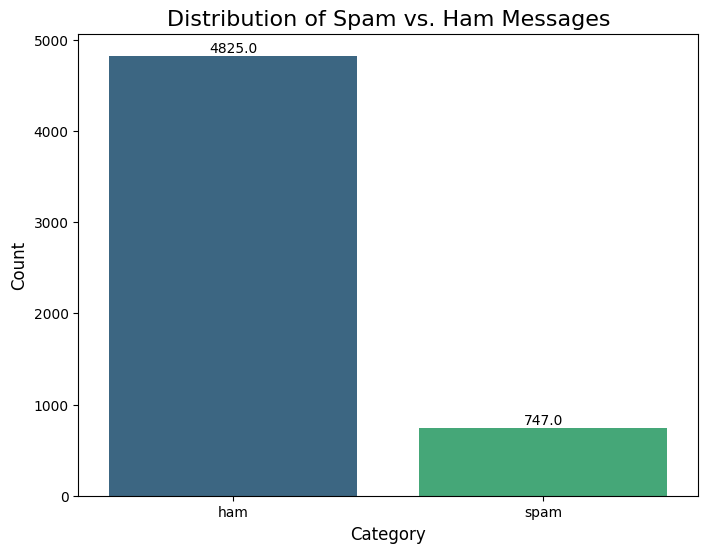

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='v1', data=df, palette='viridis')
plt.title('Distribution of Spam vs. Ham Messages', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Saving the finally preprocessed datasets as processed dataset.csv

In [ ]:
# Createing  a new DataFrame with original columns, cleaned text, and numerical labels
preprocessed_df = df.copy()
preprocessed_df['label'] = y

# Save the preprocessed DataFrame to a CSV file
preprocessed_file_path = '/content/drive/MyDrive/data/preprocessed_dataset.csv'
preprocessed_df.to_csv(preprocessed_file_path, index=False)

print(f"Preprocessed data saved to: {preprocessed_file_path}")

Preprocessed data saved to: /content/drive/MyDrive/data/preprocessed_dataset.csv
